In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [4]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
stroke_predictive_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
# Find number of individual participants
stroke_predictive_df["id"].nunique()
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [8]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 111 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [9]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [10]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are sections 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [11]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

**Hypertension and heart disease impact on stroke**

In [15]:
# check the hypertension and heart_disease columns value count summary
stroke_predictive[["hypertension","heart_disease"]].value_counts()


hypertension  heart_disease
0             0                4273
1             0                 393
0             1                 185
1             1                  58
Name: count, dtype: int64

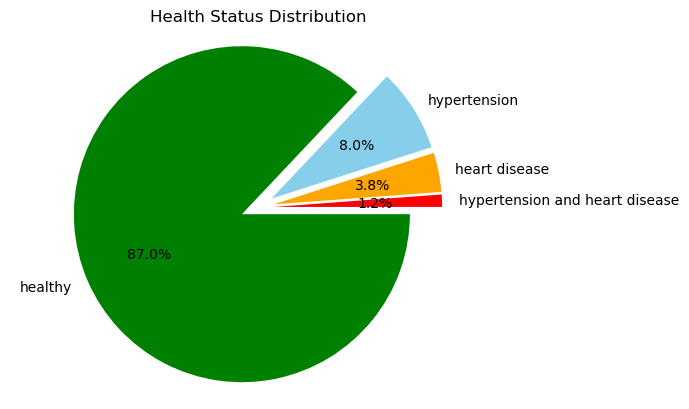

In [16]:
#creating a pie chart to visualize the health status distribution based on the conditions of hypertension and heart disease.
labels=["hypertension and heart disease","heart disease","hypertension","healthy"]
sizes=stroke_predictive[["hypertension","heart_disease"]].value_counts().sort_values(ascending=True)
colors=["red","orange","skyblue","green"]
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',explode=explode)
plt.title("Health Status Distribution")
plt.axis("equal") 
plt.savefig("graphs/healthstatus_pie.png")
plt.show()


In [17]:
#create a list of health status types
health_status=["Healthy", "Hypertension","Heart Disease","Hypertension and heart disease"]

#count people who dont have neither disease and have stroke or not
health_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 0) & (stroke_predictive["stroke"]==1)]["id"].count()
health_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 0) & (stroke_predictive["stroke"]==0)]["id"].count()

#count people who have hypertension have stroke or not
hypertension_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 0)& (stroke_predictive["stroke"]==1)]["id"].count()
hypertension_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 0)& (stroke_predictive["stroke"]==0)]["id"].count()
#people who have heart disease have stroke or not
heart_disease_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==1)]["id"].count()
heart_disease_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==0)]["id"].count()
#people who have both hypertension and heart diease have stroke or not
hh_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==1)]["id"].count()
hh_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==0)]["id"].count()

#create a summary table including four types of health status and stroke counts 

health_stroke_summary=pd.DataFrame({
    "Health Status": health_status, 
    "Stroke": [health_stroke,hypertension_stroke,heart_disease_stroke,hh_stroke],
    "No stroke": [health_ppl,hypertension_ppl,heart_disease_ppl,hh_ppl]
    })

health_stroke_summary

,Health Status,Stroke,No stroke
0,Healthy,120,4153
1,Hypertension,49,344
2,Heart Disease,29,156
3,Hypertension and heart disease,11,47


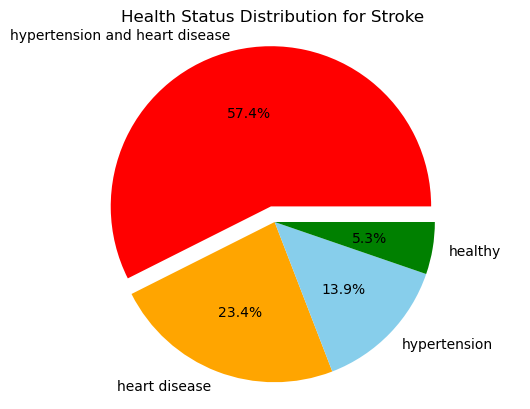

In [20]:
#Create the pie chart that show the stoke occurance for each type of health status
labels=["hypertension and heart disease","heart disease","hypertension","healthy"]
sizes=health_stroke_summary["Stroke"]
colors=["red","orange","skyblue","green"]
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',explode=explode)
plt.title("Health Status Distribution for Stroke")
plt.axis("equal") 
plt.savefig("graphs/healthstatus_stroke_pie.png")
plt.show()


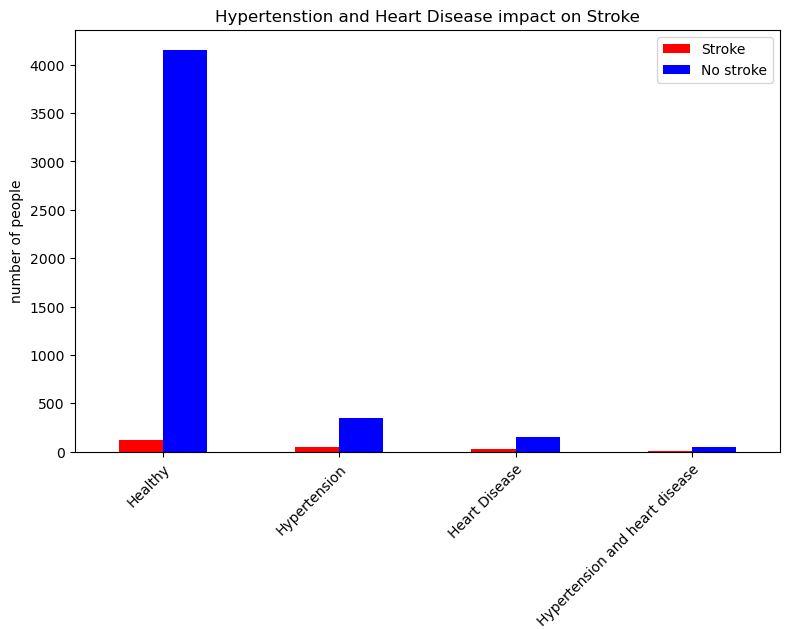

In [18]:
#create a bar chart to visualize the impact of hypertension and heart disease on stroke. 
health_stroke_fig = health_stroke_summary.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                                   title="Hypertenstion and Heart Disease impact on Stroke",
                                   xlabel="Health Status",
                                   ylabel="number of people")

# Configure x-tick rotation
xticklabels = health_status
health_stroke_fig.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)


# Resize plot to display labels
plt.tight_layout()
plt.savefig("graphs/hh_impact_stroke_bar.png")
plt.show()


In [20]:
#create a table that show percentage of the stroke for four health types
health_stroke_per= health_stroke/(health_stroke+health_ppl)*100
hypertension_stroke_per=hypertension_stroke/(hypertension_stroke+hypertension_ppl)*100
heart_disease_stroke_per=heart_disease_stroke/(heart_disease_stroke+heart_disease_ppl)*100
hh_stroke_per=hh_stroke/(hh_stroke+hh_ppl)*100

health_stroke_summary_percentage=pd.DataFrame({
    "Health Status": health_status, 
    "Stroke %": [health_stroke_per,hypertension_stroke_per,heart_disease_stroke_per,hh_stroke_per]
    })

health_stroke_summary_percentage



,Health Status,Stroke %
0,Healthy,2.808331
1,Hypertension,12.468193
2,Heart Disease,15.675676
3,Hypertension and heart disease,18.965517


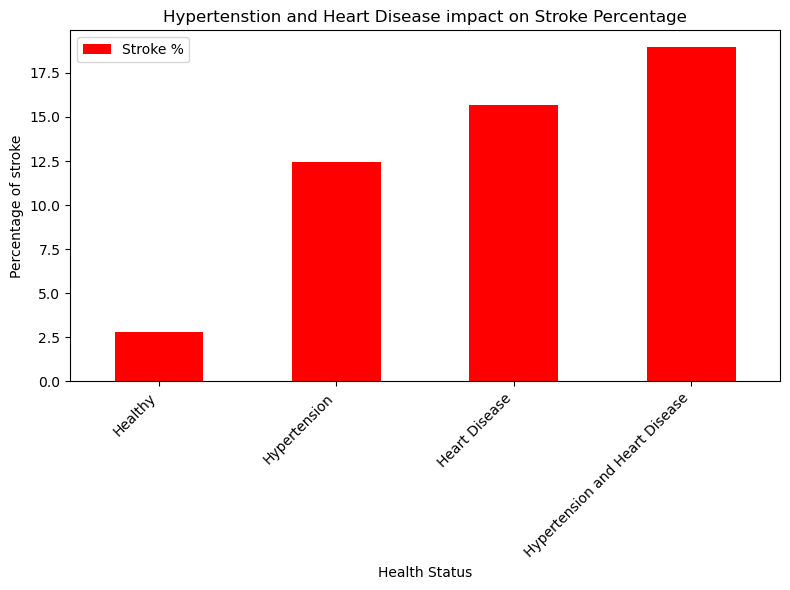

In [30]:
#create a bar chart to visualize the impact of hypertension and heart disease on stroke. 
health_stroke_perfig = health_stroke_summary_percentage.plot(kind="bar", color=["red"], figsize=(8,6),
                                   title="Hypertenstion and Heart Disease impact on Stroke Percentage",
                                   xlabel="Health Status",
                                   ylabel="Percentage of stroke")

# Configure x-tick rotation
xticklabels = ["Healthy", "Hypertension", "Heart Disease", "Hypertension and Heart Disease"]
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, rotation=45, ha="right")

# Resize plot to display labels
plt.tight_layout()
plt.savefig("graphs/hh_impact_stroke_percantage_bar.png")
plt.show()

